### Step1: Import Dataset and Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from collections import Counter
import collections
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
import os
os.chdir('Desktop')

In [4]:
data = pd .read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.shape

(7043, 21)

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

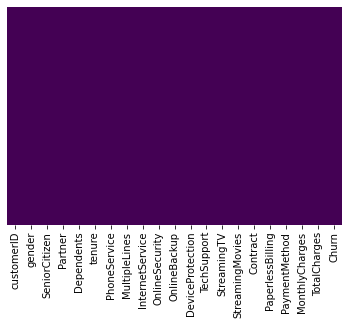

In [10]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### Step 2: Exploratory Data Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_11008\3090804475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))


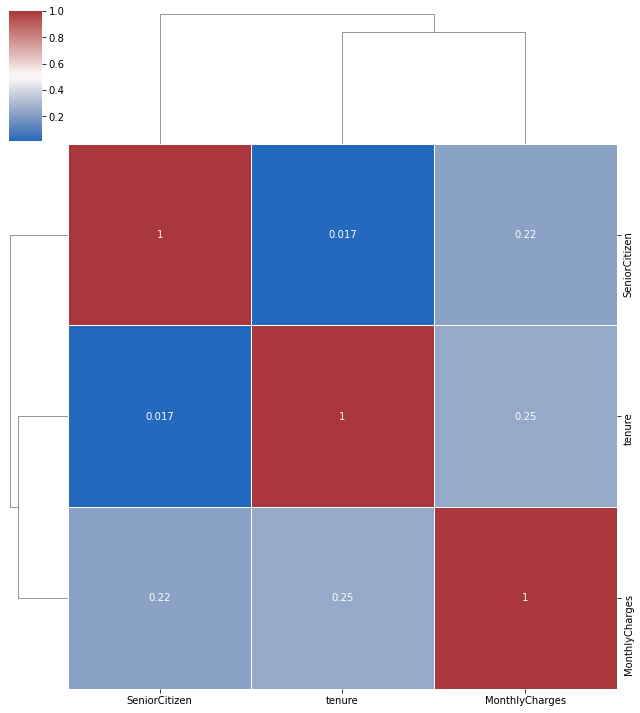

In [11]:
sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

We can see in above correlation plot variables are related to each with with 100%

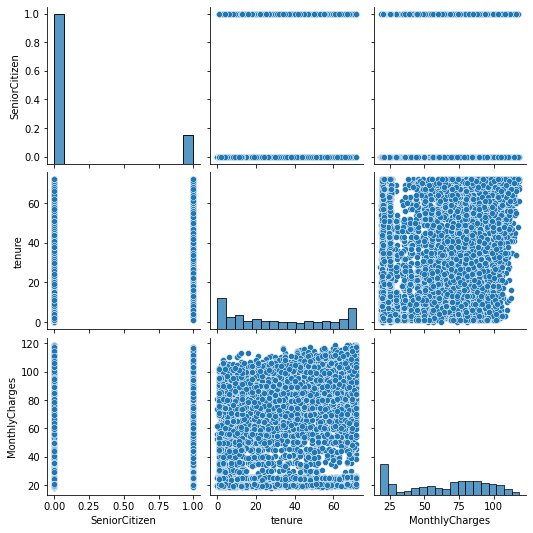

In [13]:
sns.pairplot(data)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

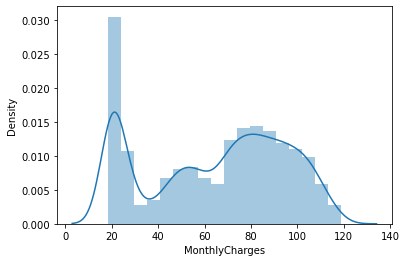

In [21]:
sns.distplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

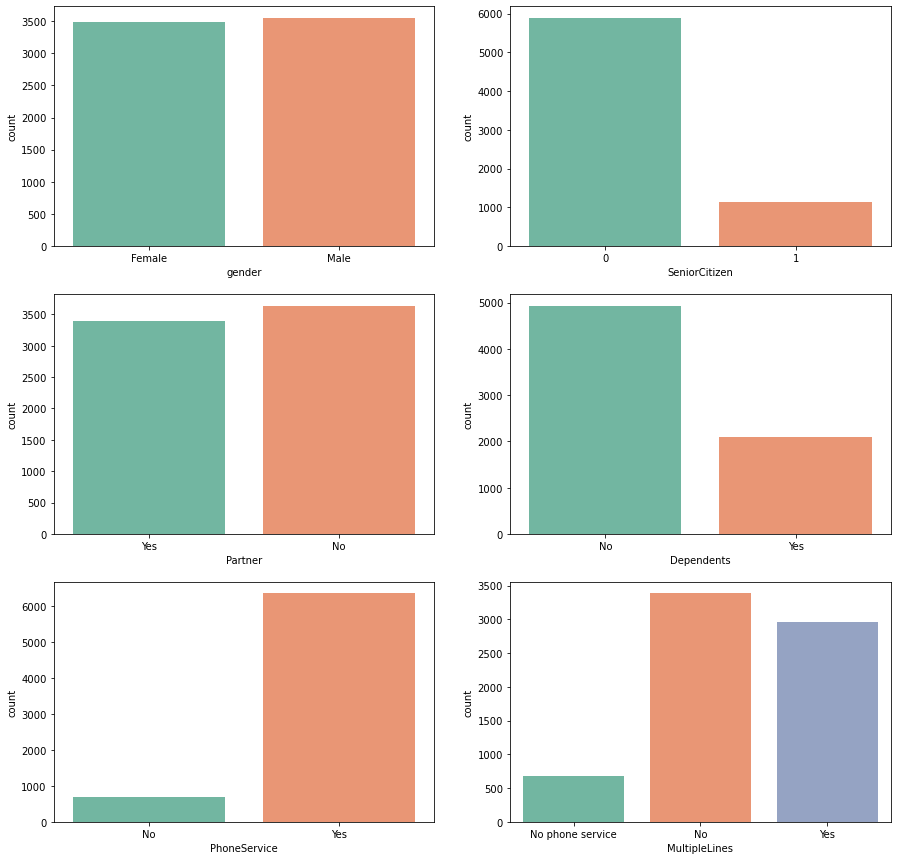

In [34]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'gender', palette = 'Set2', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'SeniorCitizen', palette = 'Set2', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'Partner', palette = 'Set2', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'Dependents', palette = 'Set2', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'PhoneService', palette = 'Set2', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'MultipleLines', palette = 'Set2', data = data)


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

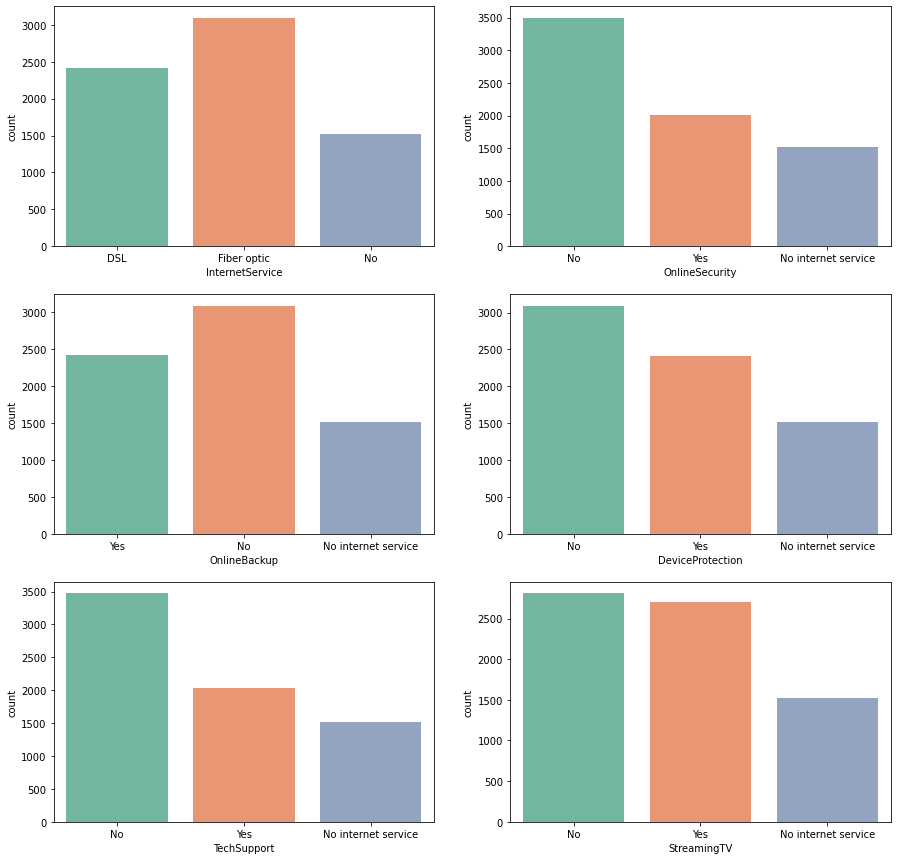

In [35]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'InternetService', palette = 'Set2', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'OnlineSecurity', palette = 'Set2', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'OnlineBackup', palette = 'Set2', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'DeviceProtection', palette = 'Set2', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'TechSupport', palette = 'Set2', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'StreamingTV', palette = 'Set2', data = data)


<AxesSubplot:xlabel='Churn', ylabel='count'>

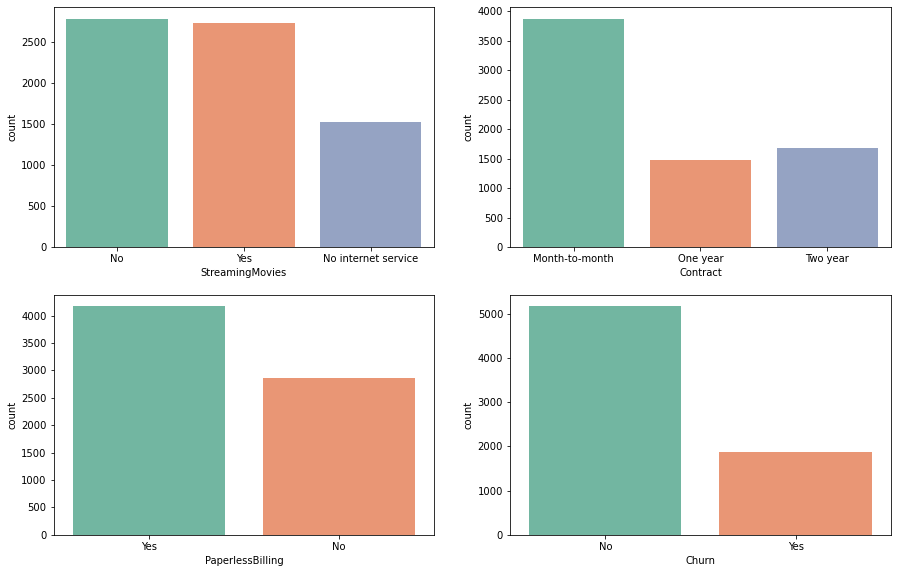

In [36]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'StreamingMovies', palette = 'Set2', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'Contract', palette = 'Set2', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'PaperlessBilling', palette = 'Set2', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'Churn', palette = 'Set2', data = data)

As per above contract graph it cleary shows monthly billing cycle is higher compare to annual contrct

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

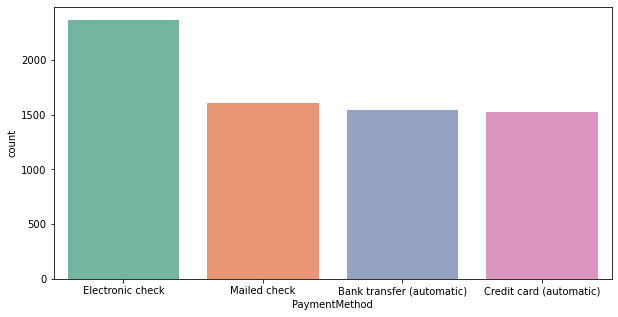

In [37]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'PaymentMethod', palette = 'Set2', data = data)

When we see the payment methods electronic check method used by most customers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges'>

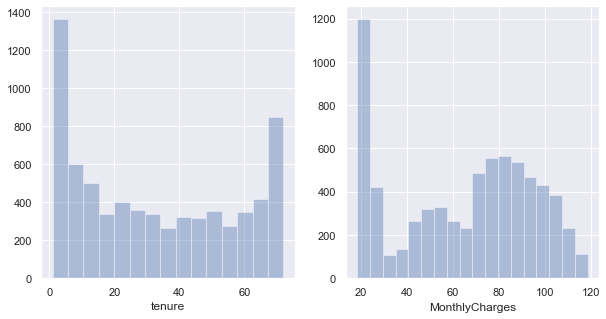

In [38]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(data['tenure'], kde = False)

plt.subplot(1,2,2)
sns.distplot(data['MonthlyCharges'], kde = False)

<AxesSubplot:xlabel='tenure'>

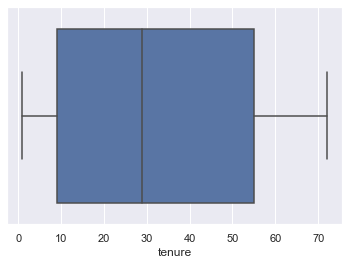

In [41]:
sns.boxplot(x=data["tenure"])

<AxesSubplot:xlabel='MonthlyCharges'>

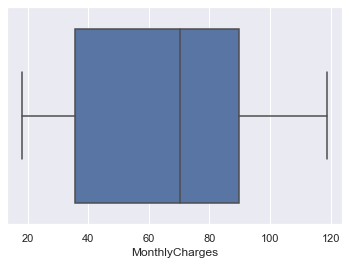

In [42]:
sns.boxplot(x=data["MonthlyCharges"])

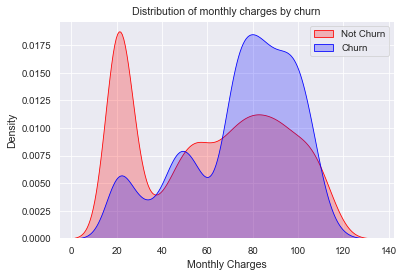

In [46]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

From above plot we can say that custmer who have higher montly charges they have higher chrun

### Step 3: Missing Value Treatment

I will drop customer ID column as it not required for analaysis

In [22]:
data = data.drop(['customerID'], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Totalcharges column does have 11 missing values which required null value treatment as mentioned below

In [25]:
data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Tenure column have 0 value for some of the rows even monthly charges have values in those rows 

In [27]:
data[data['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

As we can see there 11 rows which have 0 values so let's drop them

In [28]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)
data[data['tenure'] == 0].index

Int64Index([], dtype='int64')

In [31]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Step 4: Data Preprocessing

In [59]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [60]:
data = data.apply(lambda x: object_to_int(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [66]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 121, stratify=y)

In [68]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

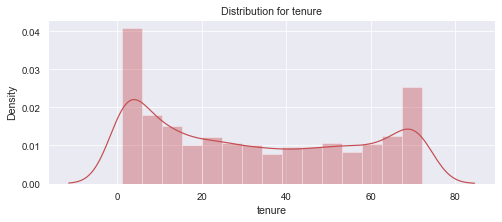

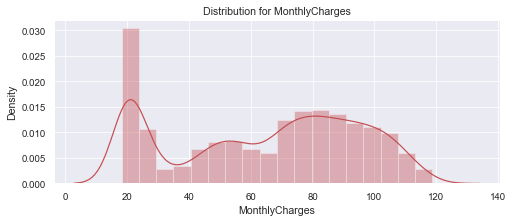

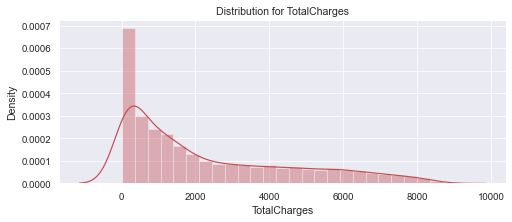

In [69]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, data)

 We required stnadard scaling feature to be used as different range of numeric values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

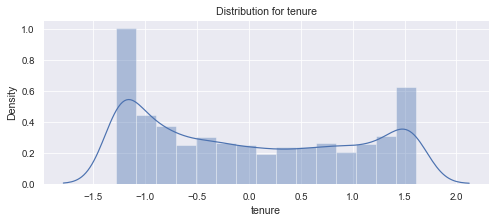

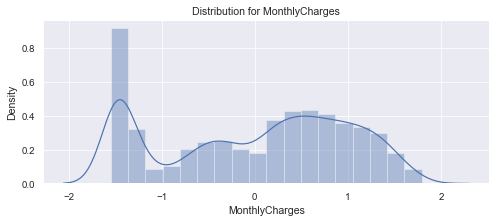

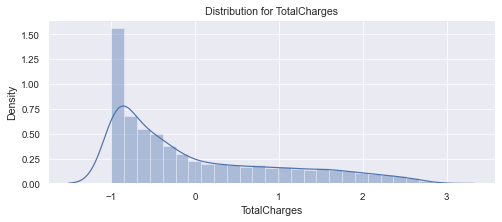

In [76]:
data_std = pd.DataFrame(StandardScaler().fit_transform(data[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, data_std, color='b')

We required one hot coding for categorical columns "PaymentMethod, Contract, InternetService" as mentioned below

In [77]:
cat_cols =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols)) #those that need label encoding

In [78]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Step 5: Model Building

### Model 1: Logistic Regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 
X = data.iloc[:, :-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
 
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.54      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

[[1384  171]
 [ 256  299]]
0.7976303317535545


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model 2: K-Nearest_Neighbours

In [81]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[0 0 1 ... 0 0 0]


In [82]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.7739872068230277


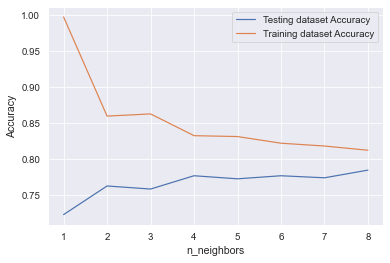

In [83]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### Model 3: Random Forest

In [84]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=2022, oob_score=True)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs = GridSearchCV(clf, param_grid=param_dist, scoring='accuracy', cv=5)
rfc_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=2022),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

In [85]:
rfc_gs.best_score_

0.8044444444444444

### Model 4: Decision Tree

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
clf = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))])

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11, 15, 20, 25]
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None]

param_grid =\
    [{'clf__class_weight': class_weight,
      'clf__criterion': criterion,
      'clf__splitter': splitter,
      'clf__max_depth': max_depth,
      'clf__min_samples_leaf': min_samples_leaf
      }]

gs_dt = GridSearchCV(estimator=clf, param_grid=param_grid,
                     scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA(random_state=42)),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'clf__class_weight': ['balanced', None],
                          'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [8, 9, 10, 11, 15, 20, 25],
                          'clf__min_samples_leaf': [2, 3, 5],
                          'clf__splitter': ['best']}],
             scoring='accuracy', verbose=1)

In [87]:
print(gs_dt.best_score_)

0.7724444444444444


### Model 5: Support Vector Machine (SVM)

In [89]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

In [90]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)

# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

In [91]:
# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")

plt.rcParams['figure.figsize'] = (8,4)
#plt.rcParams['axes.titlesize'] = 'large

In [92]:
# Divide records in training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=2, stratify=y)

# Create an SVM classifier and train it on 70% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

# Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print ('\n➔ The classifier accuracy score is {:03.2f}\n'.format(classifier_score))


➔ The classifier accuracy score is 0.80



### Model 6: Naive Bayes

In [93]:
import csv
import math
import random

In [94]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB() # create a classifier
nv.fit(X_train,y_train) # fitting the data

GaussianNB()

In [95]:
from sklearn.metrics import accuracy_score
y_pred = nv.predict(X_test) # store the prediction data
accuracy_score(y_test,y_pred) # calculate the accuracy

0.762085308056872

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

### Model 7: AdaBoost Classifier

In [99]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.7981042654028436

In [100]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Model 8: GradientBoost Classifier

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8056872037914692


In [104]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Model Summary
#### Logistic Regression - 80
#### KNN - 77.39
#### Random Forest - 80.44
#### Decision Tree - 77.24
#### Support Vector Machine - 80
#### Vaive Bayes - 76.20
#### AdaBoost - 79.81
#### Gradient Boost - 80


### Conclusion: I have applied total 8 models on this dataset and almost all model are near to 80, Random forest have high accuracy which is 80.44%